In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/exams.csv')

df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
89,male,group D,master's degree,standard,none,85,80,87
7,female,group C,master's degree,standard,none,87,100,100
84,male,group C,some college,standard,none,57,54,51
3,male,group D,high school,standard,none,75,75,70
82,male,group C,some high school,standard,none,51,49,44


In [3]:
df.describe()

,math score,reading score,writing score
count,100.000000,100.000000,100.000000
mean,66.800000,69.700000,68.530000
std,16.547452,16.077778,16.894476
min,24.000000,23.000000,23.000000
25%,54.000000,59.750000,57.000000
50%,66.000000,71.000000,69.000000
75%,80.250000,82.000000,80.250000
max,98.000000,100.000000,100.000000


In [4]:
from sklearn import preprocessing

df['math score'] = preprocessing.scale(df['math score'].astype('float64'))
df['reading score'] = preprocessing.scale(df['reading score'].astype('float64'))
df['writing score'] = preprocessing.scale(df['writing score'].astype('float64'))

In [5]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
67,male,group B,high school,free/reduced,none,-1.749217,-2.106620,-2.708540
93,male,group E,some high school,free/reduced,none,-0.838167,-0.918912,-0.983355
82,male,group C,some high school,standard,none,-0.959640,-1.293977,-1.459269
85,female,group B,high school,free/reduced,none,-1.141850,-0.418824,-0.507442
19,male,group D,high school,standard,completed,1.530565,0.956418,1.039275


In [6]:
df.describe()

,math score,reading score,writing score
count,1.000000e+02,1.000000e+02,1.000000e+02
mean,1.731948e-16,-1.998401e-16,-4.662937e-17
std,1.005038e+00,1.005038e+00,1.005038e+00
min,-2.599531e+00,-2.919263e+00,-2.708540e+00
25%,-7.774299e-01,-6.219843e-01,-6.859097e-01
50%,-4.858937e-02,8.126429e-02,2.795989e-02
75%,8.169087e-01,7.688852e-01,6.972127e-01
max,1.894985e+00,1.894083e+00,1.872123e+00


In [7]:
df['parental level of education'].unique()

array(['some high school', "bachelor's degree", 'high school',
       'some college', "associate's degree", "master's degree"],
      dtype=object)

In [10]:
parental_level_of_education = ['some high school', "bachelor's degree", 'high school',
       'some college', "associate's degree", "master's degree"]

In [11]:
label_encoding = preprocessing.LabelEncoder()

label_encoding = label_encoding.fit(parental_level_of_education)

In [12]:
df['parental level of education'] = label_encoding.transform(df['parental level of education'].astype(str))

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group C,5,standard,none,1.530565,1.018929,0.503873
1,female,group D,5,free/reduced,completed,-1.627744,-1.481510,-1.280801
2,female,group D,1,standard,none,0.255094,0.268797,0.444384
3,male,group D,2,standard,none,0.498041,0.331308,0.087449
4,female,group C,5,free/reduced,completed,-1.445534,-0.668868,-0.269486


In [13]:
label_encoding.classes_

array(["associate's degree", "bachelor's degree", 'high school',
       "master's degree", 'some college', 'some high school'],
      dtype='<U18')

In [14]:
df = pd.get_dummies(df, columns=['race/ethnicity'])

df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,male,5,standard,none,1.530565,1.018929,0.503873,False,False,True,False,False
1,female,5,free/reduced,completed,-1.627744,-1.481510,-1.280801,False,False,False,True,False
2,female,1,standard,none,0.255094,0.268797,0.444384,False,False,False,True,False
3,male,2,standard,none,0.498041,0.331308,0.087449,False,False,False,True,False
4,female,5,free/reduced,completed,-1.445534,-0.668868,-0.269486,False,False,True,False,False


In [15]:
df = pd.get_dummies(df, columns=['gender','lunch','test preparation course'])
df.head()

,parental level of education,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,5,1.530565,1.018929,0.503873,False,False,True,False,False,False,True,False,True,False,True
1,5,-1.627744,-1.481510,-1.280801,False,False,False,True,False,True,False,True,False,True,False
2,1,0.255094,0.268797,0.444384,False,False,False,True,False,True,False,False,True,False,True
3,2,0.498041,0.331308,0.087449,False,False,False,True,False,False,True,False,True,False,True
4,5,-1.445534,-0.668868,-0.269486,False,False,True,False,False,True,False,True,False,True,False


In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('math score', axis=1)
Y = df['math score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [17]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train) 

In [18]:
print('Training Score: ', linear_model.score(x_train, y_train))

Training Score:  0.9015294965766594


In [21]:
y_pred = linear_model.predict(x_test)
    
from sklearn.metrics import r2_score

print('Test Score: ', r2_score(y_test, y_pred))

Test Score:  0.9083476190045645


In [22]:
linear_model = LinearRegression(fit_intercept=False).fit(x_train, y_train) 
print('Training Score: ', linear_model.score(x_train, y_train))

Training Score:  0.9015294965766593


In [23]:
y_pred = linear_model.predict(x_test)
print('Test Score: ', r2_score(y_test, y_pred))

Test Score:  0.9083476190045645


In [24]:
pd_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})

pd_pred_actual.head(10)

,predicted,actual
52,-0.285498,-0.048589
39,1.074394,1.287618
5,-0.612375,-0.655956
81,1.547673,1.773512
12,-0.901395,-1.384797
90,-0.725753,-0.291536
88,0.535167,0.862461
89,1.201119,1.105408
46,0.612522,0.498041
29,-0.072523,-0.291536


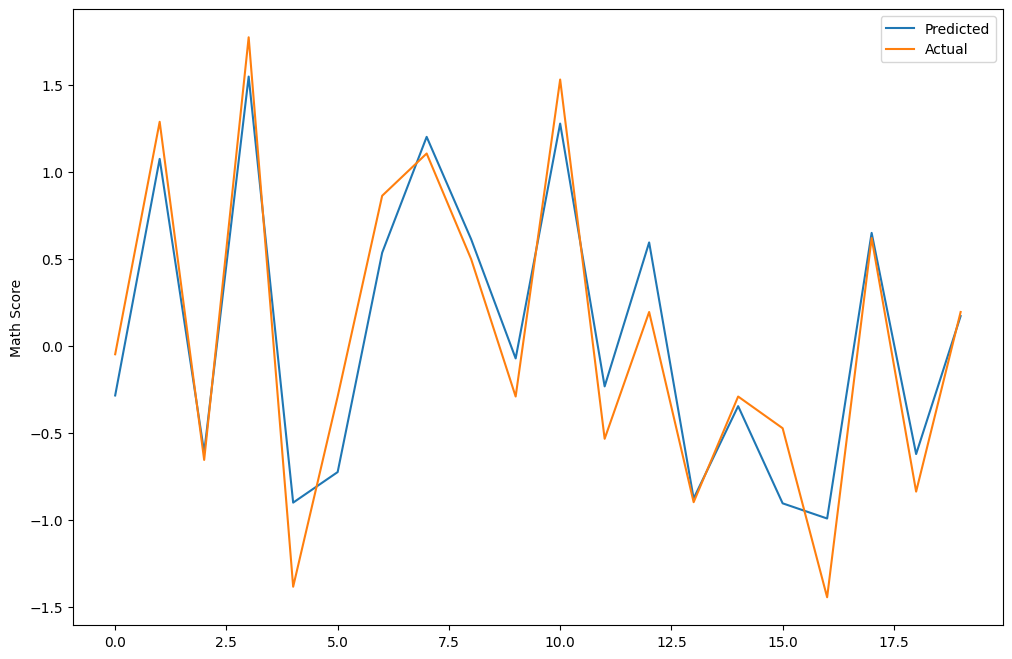

In [27]:
plt.figure(figsize = (12,8))

plt.plot(y_pred, label="Predicted")
plt.plot(y_test.values, label="Actual")

plt.ylabel("Math Score")
plt.legend()
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

X = df.drop(['math score', 'writing score'], axis=1)
Y = df['math score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train) 
print('Training Score: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)
print('Test Score: ', r2_score(y_test, y_pred))

Training Score:  0.8987818115603569
Test Score:  0.8783717547516787
